# Logistic Regression Model over Time
## with Box Plot Visualizations
Investigating associations between: 
- age standardised disease mortality rates to predict disease  
- by disease, country, sex
- to consider income & region - create a merged dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_excel("Age standardised mortality rates 2009,2014, 2019 for regression.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38556 entries, 0 to 38555
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_name  38556 non-null  object 
 1   sex_id         38556 non-null  int64  
 2   sex_name       38556 non-null  object 
 3   age_id         38556 non-null  int64  
 4   age_name       38556 non-null  object 
 5   cause_id       38556 non-null  int64  
 6   cause_name     38556 non-null  object 
 7   year           38556 non-null  int64  
 8   val            38556 non-null  float64
 9   upper          38556 non-null  float64
 10  lower          38556 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 3.2+ MB


In [4]:
df.isnull().sum()

location_name    0
sex_id           0
sex_name         0
age_id           0
age_name         0
cause_id         0
cause_name       0
year             0
val              0
upper            0
lower            0
dtype: int64

In [6]:
# df.dropna(inplace=True)

# df.isna().sum()

In [5]:
df.drop(columns={'sex_id', 'age_id', 'cause_id',"age_name"}, inplace=True)

In [6]:
df.rename(columns={"location_name":"country", "sex_name":"sex", "cause_name": "cause"}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38556 entries, 0 to 38555
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  38556 non-null  object 
 1   sex      38556 non-null  object 
 2   cause    38556 non-null  object 
 3   year     38556 non-null  int64  
 4   val      38556 non-null  float64
 5   upper    38556 non-null  float64
 6   lower    38556 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.1+ MB


In [8]:
df.rename(columns={"val":"mortality_rate", "upper":"upper_rate_estimate", "lower": "lower_rate_estimate"}, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38556 entries, 0 to 38555
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              38556 non-null  object 
 1   sex                  38556 non-null  object 
 2   cause                38556 non-null  object 
 3   year                 38556 non-null  int64  
 4   mortality_rate       38556 non-null  float64
 5   upper_rate_estimate  38556 non-null  float64
 6   lower_rate_estimate  38556 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.1+ MB


In [ ]:
# mortality rate grouped by disease, country & sex
# plot mortality rates by year in correlation matrix (2009, 2014, 2019)
# make comparison of mortality rates by year (2009, 2014, 2019)

#List of columns to include in the correlation analysis
# included_columns = ['mortality_rate']  # Only one column to be added, so no need to create variable of list? could it be:
# correlation_matrix = df('mortality_rate')  ??

# correlation_matrix = df[included_columns].corr() # Calculate correlation matrix for the included columns


# Assuming 'grouped' are columns with string values for grouping
#grouped = df.groupby(['country', 'cause', 'year'])

#plt.figure(figsize=(15, 10))

# Loop through each group and plot correlation heatmap
#for group_name, group_data in grouped:
#    correlation_matrix = group_data[included_columns].corr()  # Include only particular columns
#    plt.subplot(len(grouped), 1, list(grouped.groups.keys()).index(group_name) + 1)
#    plt.title(f'Correlation Heatmap for Group: {group_name}')
#    sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f")

# plt.tight_layout()
# plt.show()

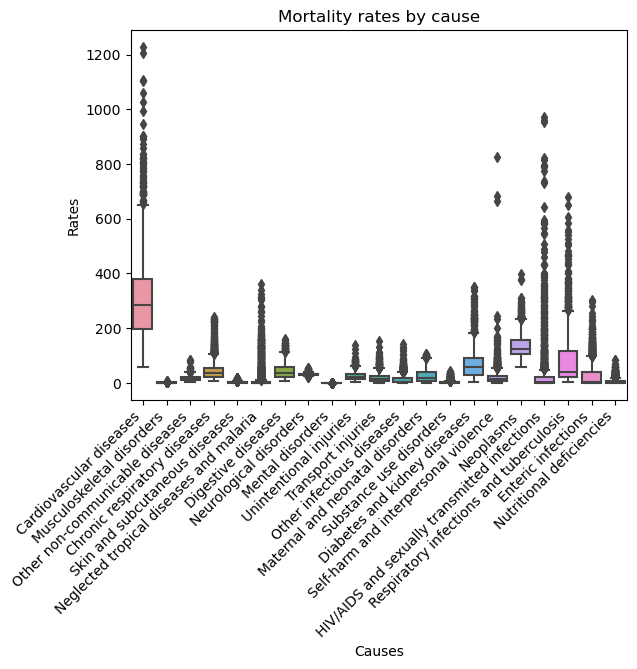

In [29]:
# Using a boxplot show Overall mortality rates for each cause
filtered_df = df[(df['year'] == 2019) & (df['sex'] == 'male')]

sns.boxplot(data=df, x="cause", y="mortality_rate")

# Set the title and labels
plt.title("Mortality rates by cause")
plt.xlabel("Causes")
plt.ylabel("Rates")

plt.xticks(rotation=45, ha='right')


# Show plot
plt.show()

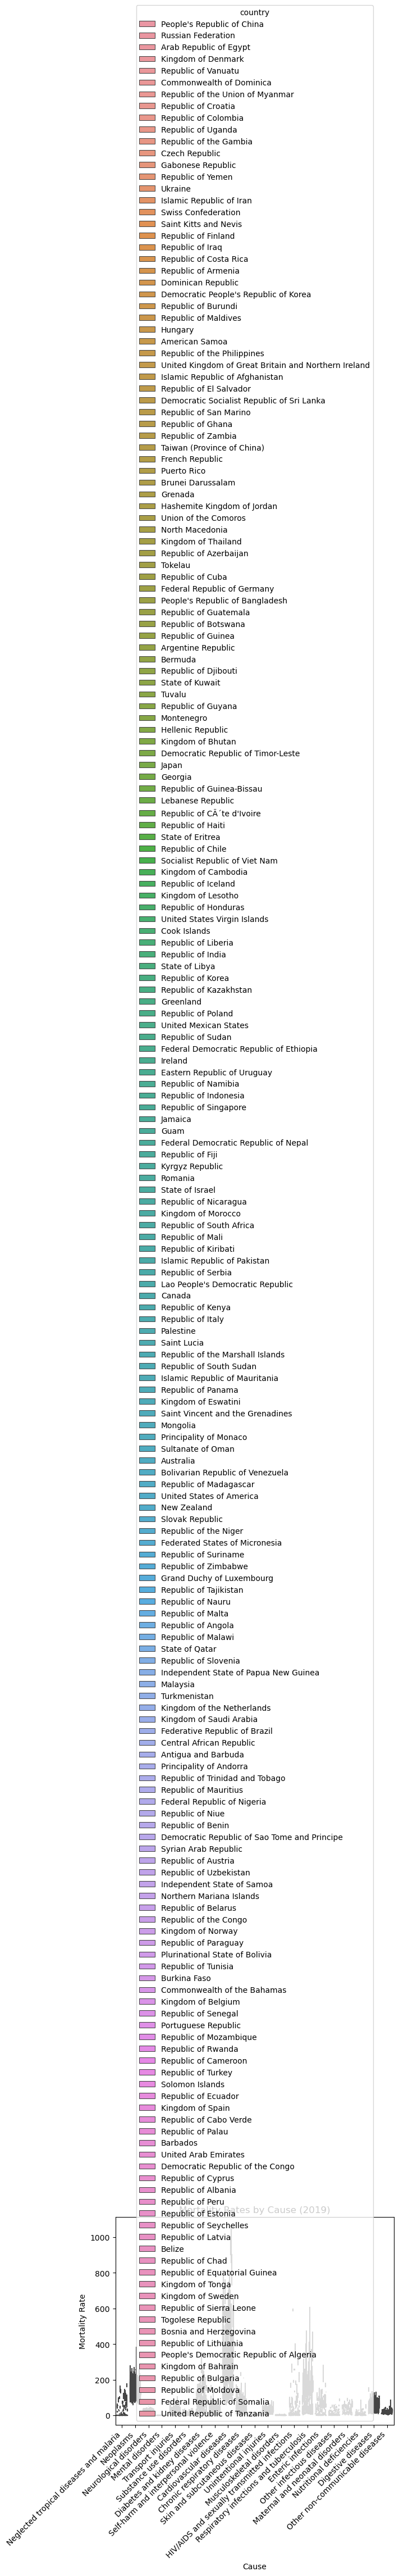

In [33]:
# Too much information!

# Filter the DataFrame for the desired conditions
#filtered_df = df[(df['year'] == 2019)]

filtered_df = df[(df['year'] == 2019) | (df['sex'] == 'male')]

# filtered_df = df[(df['year'] == 2019) |  (df['sex'] == 'female')]
# filtered_df = df[(df['year'] == 2014) | (df['sex'] == 'male')]
# filtered_df = df[(df['year'] == 2014) | (df['sex'] == 'female')]
# filtered_df = df[(df['year'] == 2009) | (df['sex'] == 'male')]
# filtered_df = df[(df['year'] == 2009) | (df['sex'] == 'female')]

# Create the boxplot
sns.boxplot(data=filtered_df, x="cause", y="mortality_rate", hue= "country") # Too much information with country as hue!

# Set the title and labels
plt.title("Mortality Rates by Cause (2019)")
plt.xlabel("Cause")
plt.ylabel("Mortality Rate")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

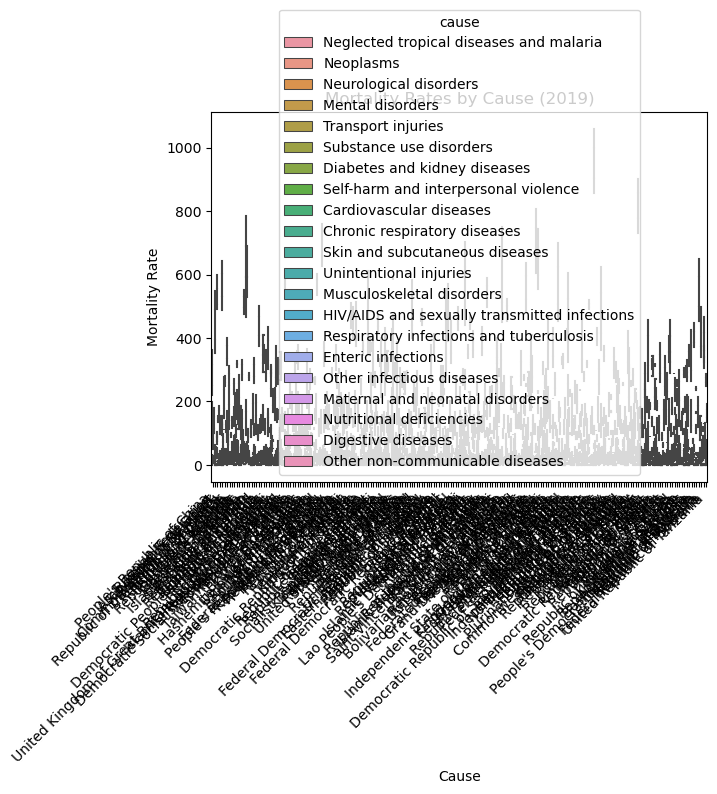

In [37]:
# Filter the DataFrame for the desired conditions
#filtered_df = df[(df['year'] == 2019)]

filtered_df = df[(df['year'] == 2019) | (df['sex'] == 'both')]

# Create the boxplot
sns.boxplot(data=filtered_df, x="country", y="mortality_rate", hue= "cause") # Too much information with country as x!

# Set the title and labels
plt.title("Mortality Rates by Cause (2019)")
plt.xlabel("Cause")
plt.ylabel("Mortality Rate")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

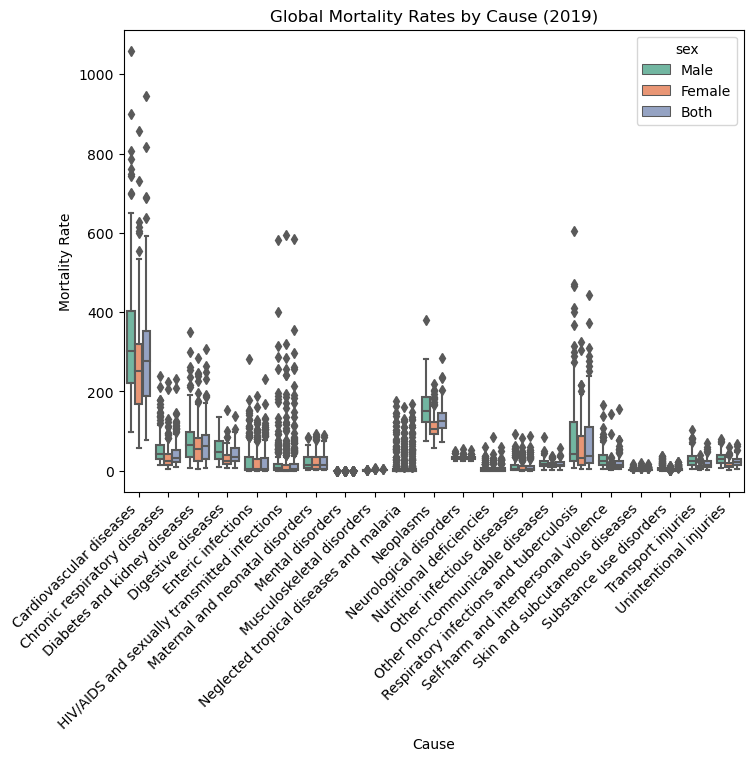

In [51]:
plt.figure(figsize=(8, 6))

# Define the order of categories for the x-axis
order = sorted(filtered_df['cause'].unique())  # Assuming you want the categories sorted alphabetically

df_2019 = df[(df['year'] == 2019)] # Filter the DataFrame for the desired conditions - here year

# Create the boxplot
sns.boxplot(data=df_2019, x="cause", y="mortality_rate", hue= "sex", palette="Set2", order=order)

# Set the title and labels
plt.title("Global Mortality Rates by Cause (2019)")
plt.xlabel("Cause")
plt.ylabel("Mortality Rate")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

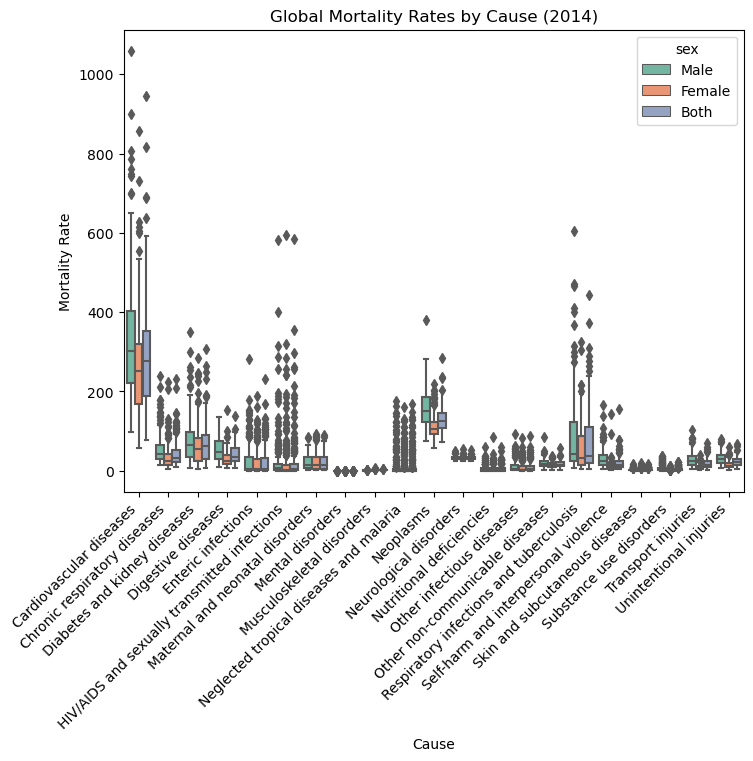

In [52]:
plt.figure(figsize=(8, 6))

df_2014 = df[(df['year'] == 2014)] # Filter the DataFrame for the desired conditions - here year

# Create the boxplot
sns.boxplot(data=df_2019, x="cause", y="mortality_rate", hue= "sex", palette="Set2", order=order)

# Set the title and labels
plt.title("Global Mortality Rates by Cause (2014)")
plt.xlabel("Cause")
plt.ylabel("Mortality Rate")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

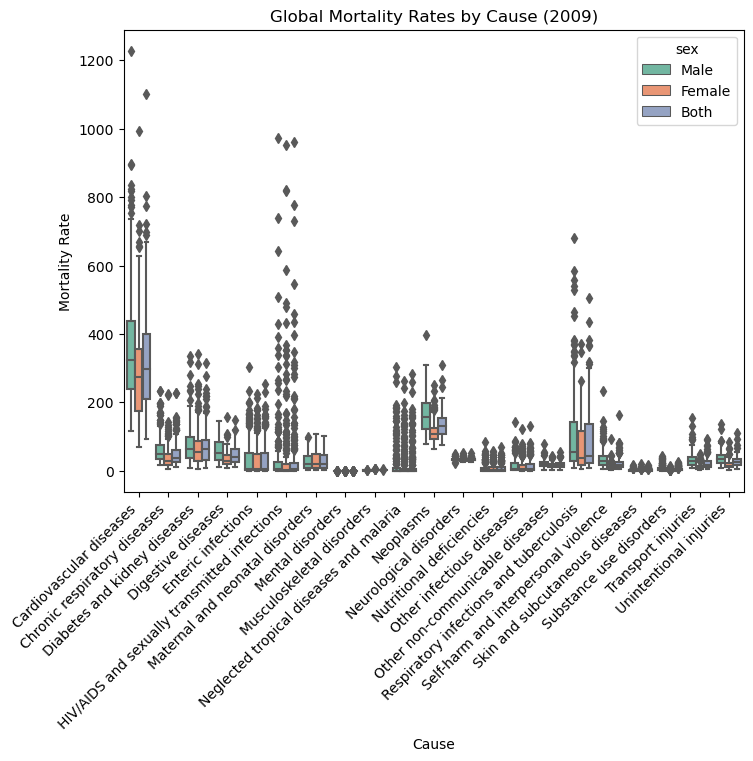

In [53]:
plt.figure(figsize=(8, 6))

df_2009 = df[(df['year'] == 2009)] # Filter the DataFrame for the desired conditions - here year

# Create the boxplot
sns.boxplot(data=df_2009, x="cause", y="mortality_rate", hue= "sex", palette="Set2", order=order)

# Set the title and labels
plt.title("Global Mortality Rates by Cause (2009)")
plt.xlabel("Cause")
plt.ylabel("Mortality Rate")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))

# Define the order of categories for the x-axis
order = sorted(filtered_df['cause'].unique())  # Assuming you want the categories sorted alphabetically

df_2019 = df[(df['year'] == 2019)] # Filter the DataFrame for the desired conditions - here year

# Create the boxplot
sns.boxplot(data=df_2019, x="cause", y="mortality_rate", hue= "income", palette="Set2", order=order)

# Set the title and labels
plt.title("Global Mortality Rates by Cause (2019)")
plt.xlabel("Cause")
plt.ylabel("Mortality Rate")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [15]:
# List of columns to include in the correlation analysis
included_columns = ['mortality_rate']  # Add your desired column names here

# Calculate correlation matrix for the included columns
correlation_matrix = df[included_columns].corr()

# Assuming 'group_column' is the column with string values for grouping
# and 'included_columns' is a list of columns to include in the correlation analysis
grouped = df.groupby(['country'])

plt.figure(figsize=(15, 10))

# Loop through each group and plot correlation heatmap
for group_name, group_data in grouped:
    correlation_matrix = group_data[included_columns].corr()  # Include only particular columns
    plt.subplot(len(grouped), 1, list(grouped.groups.keys()).index(group_name) + 1)
    plt.title(f'Correlation Heatmap for Group: {group_name}')
    sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f")

plt.tight_layout()
plt.show()

ValueError: ('Afghanistan',) is not in list

<Figure size 1500x1000 with 0 Axes>

In [59]:
# Filter the DataFrame for the desired conditions for each year
df_2019 = df[(df['year'] == 2019) | (df['sex'] == 'both')]
df_2014 = df[(df['year'] == 2014) | (df['sex'] == 'both')]
df_2009 = df[(df['year'] == 2009) | (df['sex'] == 'both')]

# Combine the filtered DataFrames into one DataFrame
combined_df = pd.concat([df_2019, df_2014, df_2009])

# Declare your feature (independent) variable(s). Using mortality_rate from 3 different years
feature_vars = ['mortality_rate']  # Assuming mortality_rate is the only feature you're using
X = combined_df[feature_vars] 

# Declare your target (dependent) variable(s). We want to predict cause_name, so that will be our target series
y = combined_df['cause']

In [60]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
# We use the train_test_split function from the sklearn.model_selection library

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
logreg = LogisticRegression() 

logreg.fit(X_train, y_train)
#logreg

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
logreg.intercept_

array([-3.73553339e+00, -5.58677056e-01, -1.08108234e+00, -5.45004734e-01,
       -1.37511196e-01, -2.94610959e-01,  7.22439019e-04,  2.00809234e+00,
        1.97317528e+00,  3.58489931e-01, -2.02002532e+00, -2.20867500e-01,
        1.08235512e+00,  6.46336121e-01,  2.97905702e-01, -1.28439377e+00,
        9.45092683e-02,  1.69923817e+00,  1.45172983e+00,  2.34117578e-01,
        3.10344934e-02])

In [63]:
# Check your coefficient for this model
logreg.coef_
# outputs relate to the 21 disease groups....

array([[ 0.41766461],
       [ 0.38973076],
       [ 0.39857617],
       [ 0.38880006],
       [ 0.37783229],
       [ 0.38235339],
       [ 0.37226863],
       [-5.00793983],
       [-1.7705817 ],
       [ 0.35778062],
       [ 0.40821788],
       [ 0.38104789],
       [ 0.27351585],
       [ 0.3422813 ],
       [ 0.35607207],
       [ 0.40065937],
       [ 0.37052566],
       [ 0.18272463],
       [ 0.24956903],
       [ 0.35860097],
       [ 0.37030036]])

In [64]:
# Probabilities for a disease cause with zero mortality rate
pred1 = pd.DataFrame({'mortality_rate' : 0}, index=[100000000])

#index = [0] creates a new dictionary object in the dataframe - 
# with value 0 for disease specific mortality rate. Illustration example
# index here is a technicality for the function

logreg.predict_proba(pred1)
# probability for a mortality rate will predict an  
# above average association with a specific disease
# upper and lower probabilities?

array([[0.0005854 , 0.01403289, 0.0083228 , 0.01422607, 0.02138244,
        0.01827383, 0.02455225, 0.18275994, 0.17648862, 0.03511299,
        0.00325456, 0.01967234, 0.07241665, 0.046825  , 0.03304885,
        0.00679161, 0.02696637, 0.1341984 , 0.10477456, 0.03100656,
        0.02530788]])

In [65]:
print('training accuracy: ' + str(logreg.score(X_train,y_train)))
print('testing accuracy: ' + str(logreg.score(X_test,y_test)))
print('baseline accuracy: ' + str(df['AboveAverage'].value_counts(normalize = True).max()))

training accuracy: 0.22980158215536248
testing accuracy: 0.22341804979253113


KeyError: 'AboveAverage'

In [66]:
# We can make this more visually appealing
#confusion matrix - 4 categories. True positive, False positive, True negative, False negative

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

NameError: name 'confusion_matrix' is not defined